In [1]:
from datetime import date
from pyspark.sql import SparkSession, DataFrame

import constants
from scripts import games, developers, genres, developers, predictions, platforms, publisher

from utils.spark_utils import SparkUtils
import pandas as pd

pd.set_option('display.max_rows', None)  # Показывать все строки
pd.set_option('display.max_columns', None)  # Показывать все столбцы
pd.set_option('display.max_colwidth', None)  # Полная ширина столбцов
pd.set_option('display.width', None)  # Полная ширина вывода


spark_session: SparkSession = SparkUtils.get_spark_session(app_name="app")
df: DataFrame = spark_session.read.csv(
    path=constants.DATASET_FULLPATH,
    sep=",",
    header=True,
    schema=SparkUtils.DATASET_STRUCT,
).drop("img")

df.show(50)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/26 19:39:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------------------+-------+----------------+--------------------+--------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|               title|console|           genre|           publisher|           developer|critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|last_update|
+--------------------+-------+----------------+--------------------+--------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|  Grand Theft Auto V|    PS3|          Action|      Rockstar Games|      Rockstar North|         9.4|      20.32|    6.37|    0.99|     9.85|       3.12|  2013-09-17|       NULL|
|  Grand Theft Auto V|    PS4|          Action|      Rockstar Games|      Rockstar North|         9.7|      19.39|    6.06|     0.6|     9.71|       3.02|  2014-11-18| 2018-01-03|
|Grand Theft Auto:...|    PS2|          Action|      Rockstar Games|      Rockstar North|         9.

+-----------------------------------+----+--------------------+
|publisher                          |year|released_title_count|
+-----------------------------------+----+--------------------+
|honeybee                           |2015|1                   |
|Team17 Software                    |2015|14                  |
|Arc System Works                   |2015|10                  |
|Atlus                              |2015|18                  |
|MidBoss                            |2015|3                   |
|Next Dimension Game Adventures Ltd.|2015|1                   |
|Koei Tecmo                         |2015|4                   |
|Avalanche Studios                  |2015|1                   |
|The Behemoth                       |2015|1                   |
|Shin'en                            |2015|1                   |
|505 Games                          |2015|5                   |
|Nnooo                              |2015|3                   |
|Nicalis                            |201

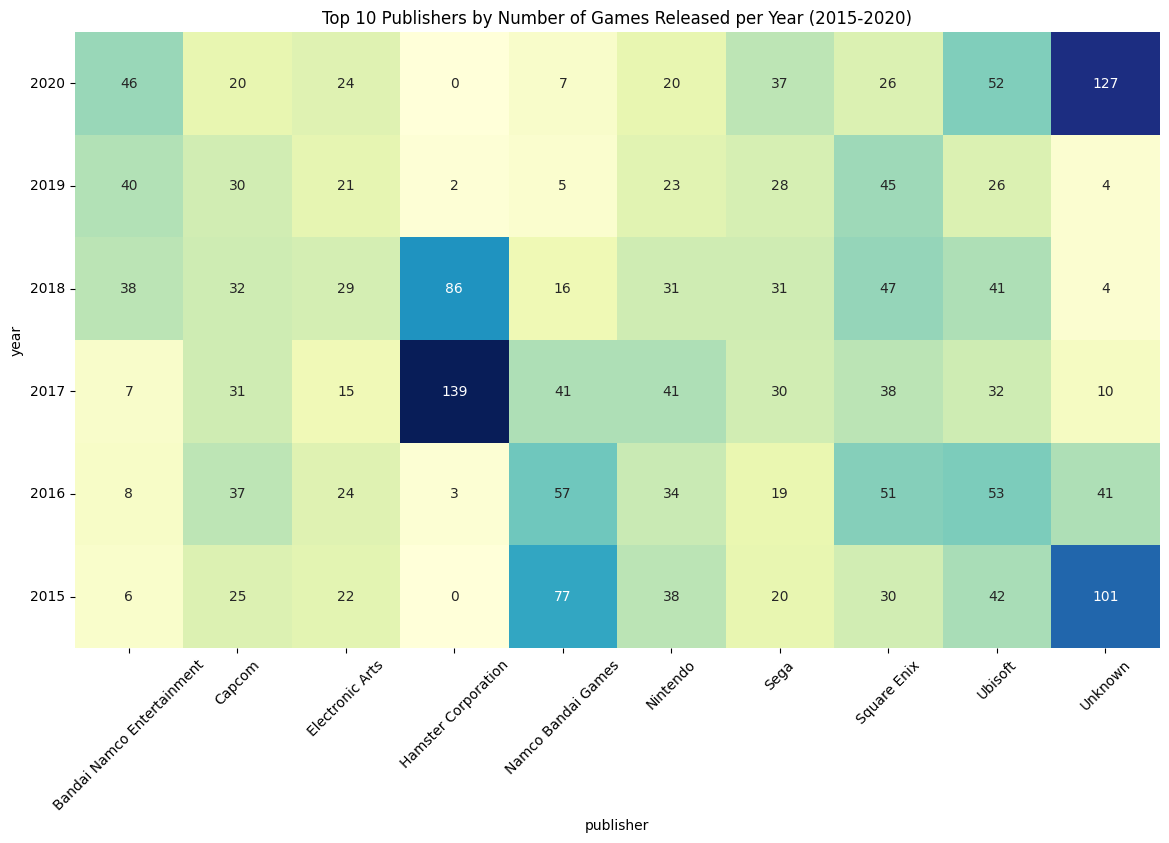

DataFrame[publisher: string, year: int, released_title_count: bigint]

In [2]:
# кол-во выпущенных игр на каждый год для топ n издателей
publisher.count_of_games_by_year_from_publisher(df, 2015, 2020)

+--------------------+--------+------------+
|               title|na_sales|release_date|
+--------------------+--------+------------+
|  Grand Theft Auto V|   26.19|  2013-09-17|
|Call of Duty: Bla...|   17.65|  2010-11-09|
|Call of Duty: Mod...|   15.57|  2011-11-08|
|Call of Duty: Ghosts|   15.06|  2013-11-05|
|Call of Duty: Bla...|   14.12|  2012-11-13|
|Call of Duty: Mod...|   13.54|  2009-11-10|
|Call of Duty: Bla...|   12.82|  2015-11-06|
| Grand Theft Auto IV|    11.6|  2008-04-29|
|Guitar Hero III: ...|   11.14|  2007-10-28|
|Call of Duty: Adv...|   10.66|  2014-11-04|
|Call of Duty 4: M...|   10.06|  2007-11-05|
|The Elder Scrolls...|    9.52|  2011-11-11|
|Call of Duty: Wor...|    9.38|  2008-11-10|
|           Minecraft|    9.07|  2014-10-07|
|Red Dead Redempti...|    9.02|  2018-10-26|
|LEGO Star Wars: T...|    8.95|  2007-11-06|
|  Call of Duty: WWII|    8.49|  2017-11-03|
|Grand Theft Auto:...|    8.41|  2002-10-28|
|       Battlefield 3|    8.22|  2011-10-25|
|       Ma

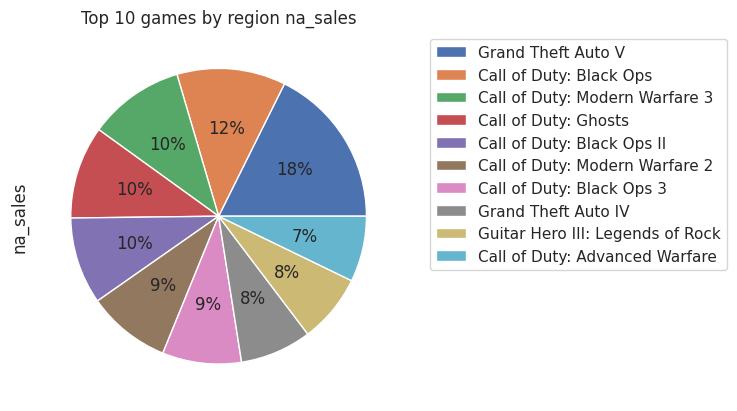

DataFrame[title: string, na_sales: double, release_date: date]

In [14]:
# диаграмма популярных игр (определяется по продажам) в определенном регионе
games.get_popular_games_by_region(df, "na_sales", 10)

+----------------+-----------+
|genre           |other_sales|
+----------------+-----------+
|Sports          |128.19     |
|Action          |112.41     |
|Shooter         |108.43     |
|Misc            |58.52      |
|Racing          |56.44      |
|Role-Playing    |33.75      |
|Platform        |30.38      |
|Adventure       |30.11      |
|Fighting        |28.65      |
|Simulation      |24.34      |
|Action-Adventure|18.4       |
|Puzzle          |7.38       |
|Strategy        |7.29       |
|Music           |4.93       |
|MMO             |1.03       |
|Party           |0.52       |
|Visual Novel    |0.13       |
|Sandbox         |0.12       |
|Education       |0.08       |
|Board Game      |0.02       |
+----------------+-----------+



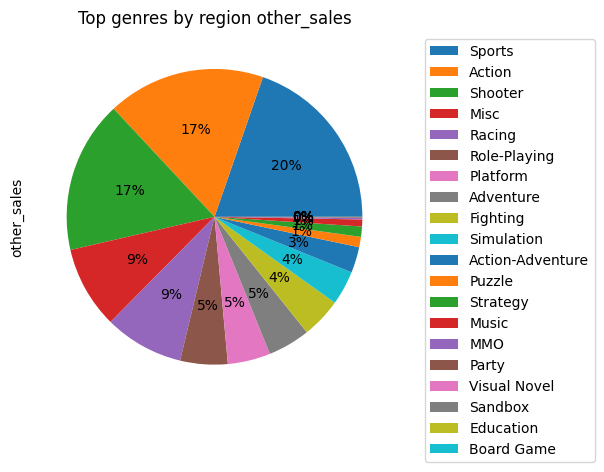

DataFrame[genre: string, other_sales: double]

In [4]:
# диаграмма популярных жанров в определенном регионе
genres.get_popular_genres_by_region(df, "other_sales")

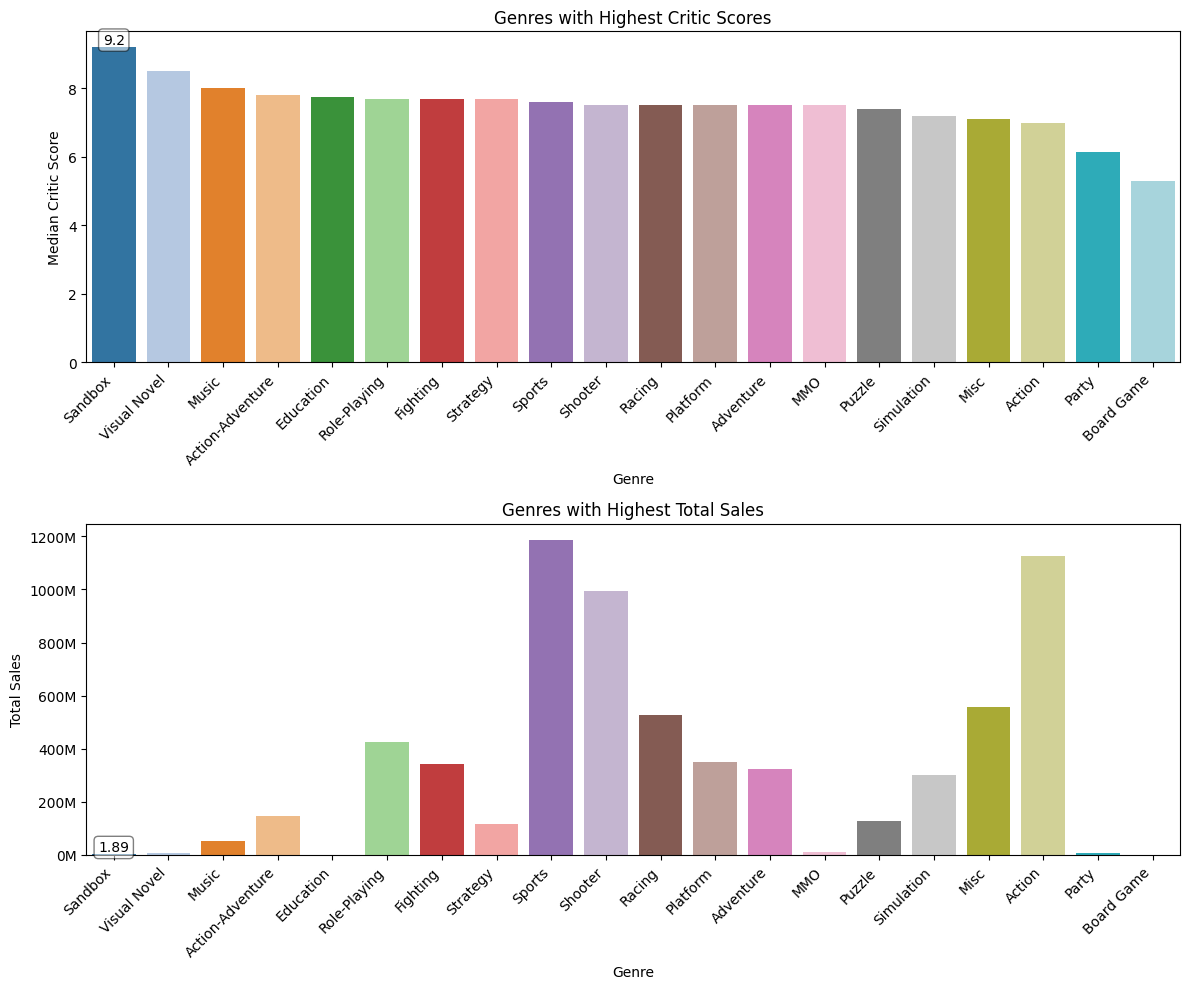

In [5]:
# Топ жанров по оценкам критиков и продажам
genres.get_top_genres_by_critic_score_and_sales(df)

Correlation between critic_score and na_sales: 0.3603082987235861
Correlation between critic_score and jp_sales: 0.14743267236534344
Correlation between critic_score and pal_sales: 0.3152068070313734
Correlation between critic_score and other_sales: 0.3206361999344065
Correlation between critic_score and total_sales: 0.3696868028666367


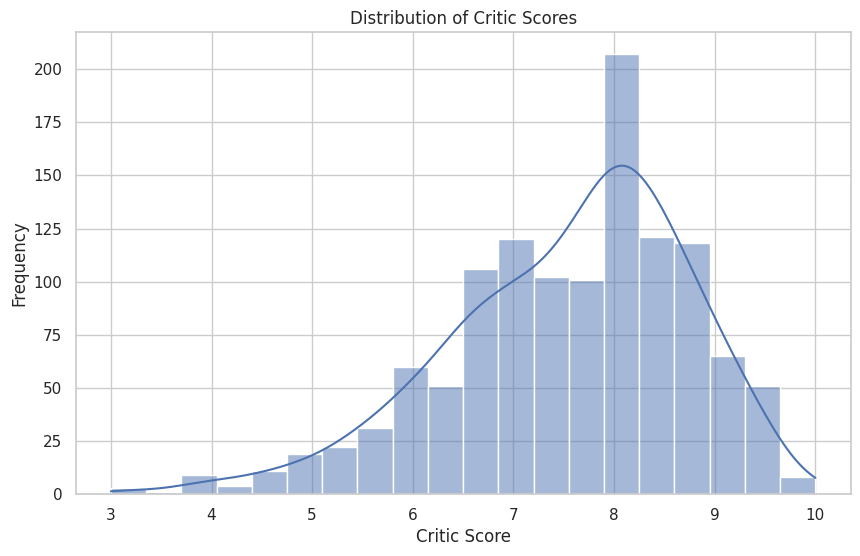

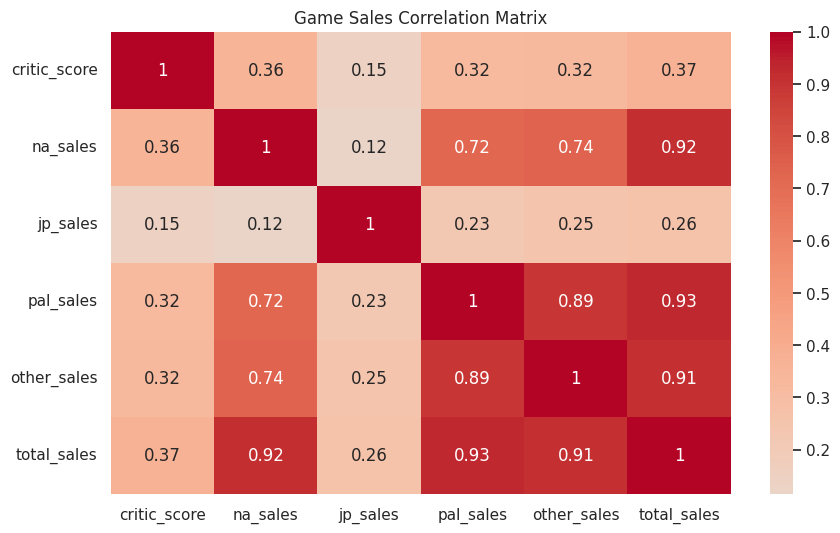

24/06/26 19:40:13 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [6]:
# распределение продаж игр по оценкам критиков и тепловая карта корреляции между продажами
# игр в различных регионах и оценками критиков
games.game_sale_estimates(df)

+-------+--------+
|console|jp_sales|
+-------+--------+
|PS4    |7.56    |
|3DS    |5.36    |
|NS     |2.16    |
|WiiU   |1.17    |
|PS3    |0.27    |
|XOne   |0.09    |
+-------+--------+



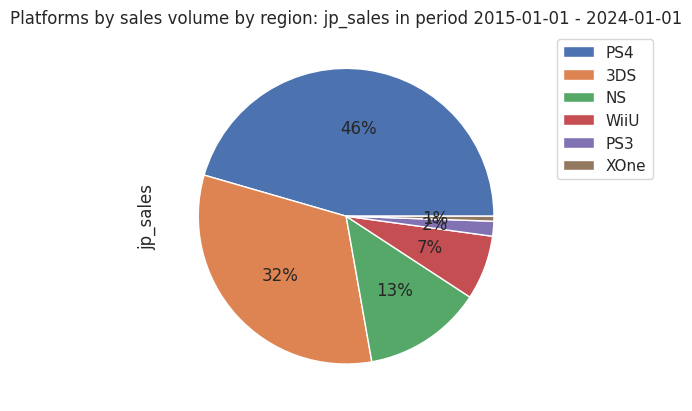

DataFrame[console: string, jp_sales: double]

In [13]:
# диаграмма популярных игровых платформ в определенном регионе и промежутке времени
platforms.get_popular_platforms_by_region(df, "jp_sales", date(2015, 1, 1), date(2024, 1, 1))

+--------------------------------------------+------------------+-------------------+------------------+-------------------+
|title                                       |na_sales          |jp_sales           |pal_sales         |other_sales        |
+--------------------------------------------+------------------+-------------------+------------------+-------------------+
|Grand Theft Auto: Vice City                 |8.40999984741211  |0.4699999988079071 |5.489999771118164 |1.7799999713897705 |
|Grand Theft Auto                            |0.7900000214576721|0.03999999910593033|1.350000023841858 |0.14000000059604645|
|Grand Theft Auto V                          |26.19000005722046 |1.6600000318139791 |28.140000343322754|8.319999814033508  |
|Grand Theft Auto: Liberty City Stories      |4.460000038146973 |0.3099999949336052 |4.229999899864197 |2.240000009536743  |
|Grand Theft Auto: Vice City Stories         |2.4800000190734863|0.18999999575316906|2.0599999707192183|1.3200000524520874 |


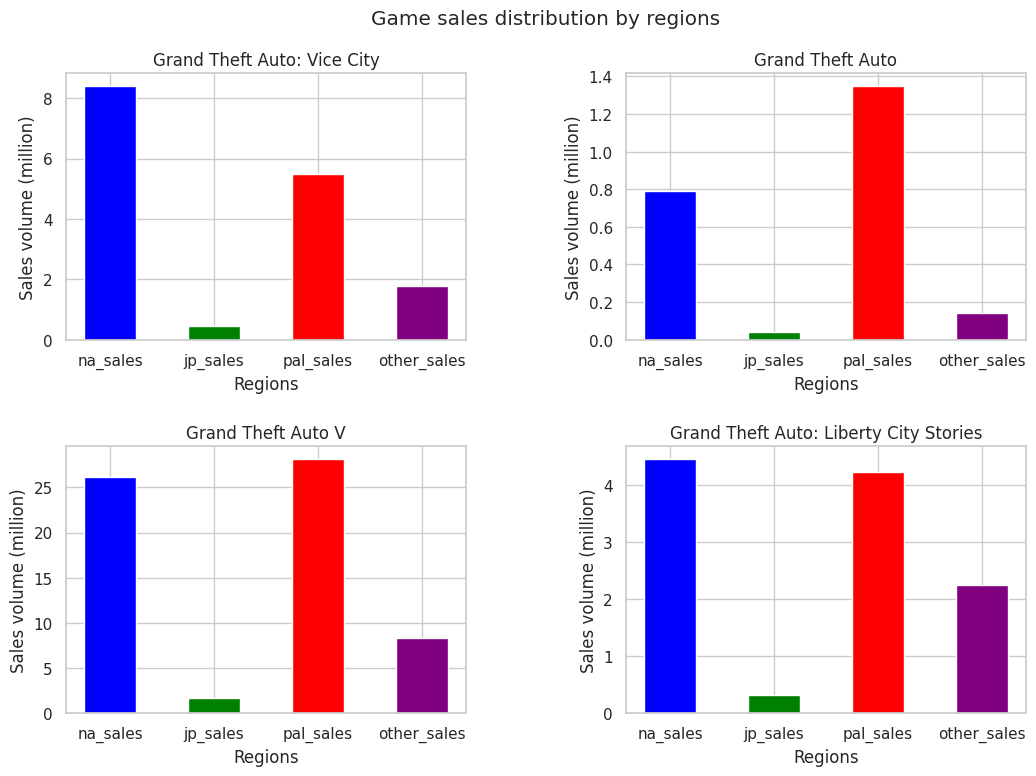

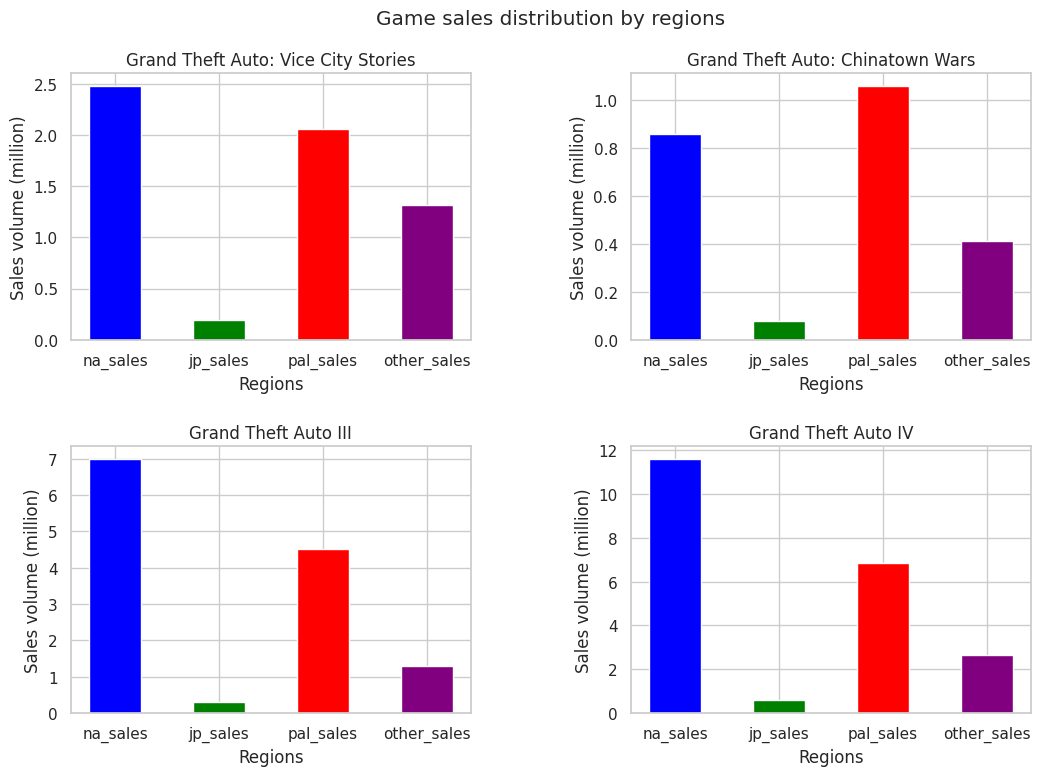

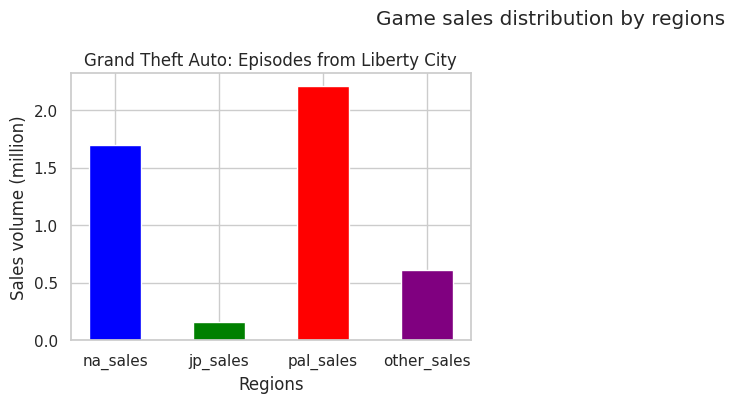

DataFrame[title: string, na_sales: double, jp_sales: double, pal_sales: double, other_sales: double]

In [8]:
games.get_game_sales_by_region(df, "grand theft auto")

In [9]:
predictions.predict_next_game_performance_linear_regression(spark_session, df, "Call of Duty", "PS4")

+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+
|title                                  |console|genre  |publisher |developer         |critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|release_date_numeric|
+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+
|Call of Duty: Ghosts                   |PS4    |Shooter|Activision|Infinity Ward     |7.5         |4.17       |1.79    |0.05    |1.64     |0.69       |2013-11-15  |1384459200          |
|Call of Duty: Advanced Warfare         |PS4    |Shooter|Activision|Sledgehammer Games|8.5         |7.53       |2.84    |0.14    |3.34     |1.22       |2014-11-04  |1415048400          |
|Call of Duty: Black Ops 3              |PS4    |Shooter|Activisi

24/06/26 19:40:18 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/06/26 19:40:18 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/06/26 19:40:18 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


evaluator: RegressionEvaluator_e0eba0fd83c4
Root Mean Squared Error (RMSE) on test data for critic_score: 0.7235570462073007


evaluator: RegressionEvaluator_6182471f94a9
Root Mean Squared Error (RMSE) on test data for total_sales: 0.03666198391750086
evaluator: RegressionEvaluator_d42afdc56d26
Root Mean Squared Error (RMSE) on test data for na_sales: 0.24321103247299725
evaluator: RegressionEvaluator_42cbaa257d04
Root Mean Squared Error (RMSE) on test data for jp_sales: 0.041811139688541665
evaluator: RegressionEvaluator_341cd2b00856
Root Mean Squared Error (RMSE) on test data for pal_sales: 0.29654822733356667
evaluator: RegressionEvaluator_89bc0b0cb73d
Root Mean Squared Error (RMSE) on test data for other_sales: 0.010249781800135693
Predicted Critic Score: 8.09800488894128
Predicted Total Sales: 9.707214261666941
Predicted NA Sales: 3.3455177821083257
Predicted JP Sales: 0.2707888170883259
Predicted PAL Sales: 4.5075029907694955
Predicted Other Sales: 1.5158784108667214


In [10]:
predictions.predict_next_game_performance_random_tree(spark_session, df, "Call of Duty", "PS4")

+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|title                                  |console|genre  |publisher |developer         |critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|last_update|
+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|Call of Duty: Ghosts                   |PS4    |Shooter|Activision|Infinity Ward     |7.5         |4.17       |1.79    |0.05    |1.64     |0.69       |2013-11-15  |2018-03-21 |
|Call of Duty: Advanced Warfare         |PS4    |Shooter|Activision|Sledgehammer Games|8.5         |7.53       |2.84    |0.14    |3.34     |1.22       |2014-11-04  |2018-01-04 |
|Call of Duty: Black Ops 3              |PS4    |Shooter|Activision|Treyarch          |8.1         |15.09     

24/06/26 19:40:30 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for critic_score: -inf
Training model for total_sales...


24/06/26 19:40:32 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for total_sales: -inf
Training model for na_sales...


24/06/26 19:40:34 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for na_sales: -inf
Training model for jp_sales...


24/06/26 19:40:35 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for jp_sales: -inf
Training model for pal_sales...


24/06/26 19:40:37 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for pal_sales: -inf
Training model for other_sales...


24/06/26 19:40:39 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 5 (= number of training instances)


R^2 for other_sales: -inf
Predicted values for the next game in the series:
critic_score: 8.120000123977661
total_sales: 7.05200006365776
na_sales: 2.7339999213814736
jp_sales: 0.1659999990835786
pal_sales: 3.0189999997615815
other_sales: 1.1390000253915786


                  developer  total_sales  critic_score
0                 EA Canada   275.560000      7.817094
1                EA Tiburon   178.329999      7.832979
2          Ubisoft Montreal   172.960000      7.433981
3                  Treyarch   150.190000      7.831915
4         Traveller's Tales   149.549999      7.129231
5             Infinity Ward   118.969999      8.092308
6            Rockstar North   116.909998      9.060869
7                    Konami   109.540001      6.949462
8           Visual Concepts    97.610000      7.758065
9                    Capcom    93.020000      7.743046
10                    Namco    73.280000      8.009302
11        Vicarious Visions    65.990000      7.088372
12                  Ubisoft    62.400000      6.624074
13             EA Black Box    57.200000      7.468182
14  Neversoft Entertainment    56.300000      7.974286
15                  EA DICE    55.780000      8.315385
16        EA Redwood Shores    54.900000      7.696296
17        

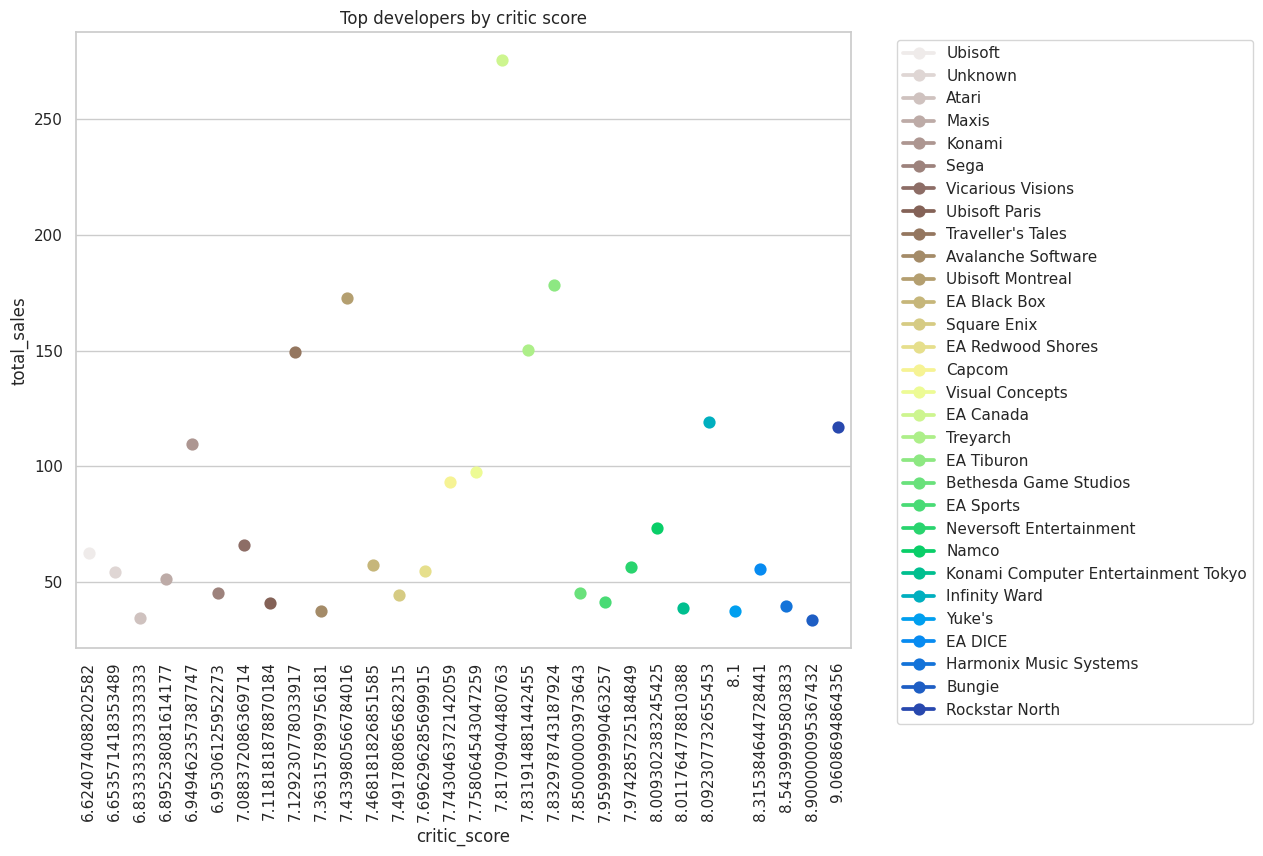

In [11]:
developers.get_top_developers_by_critic_score(df)

+--------------------+------------------+-----+------------------+
|           publisher|       total_sales|title|      critic_score|
+--------------------+------------------+-----+------------------+
|          Activision| 722.7699973676354| 1582| 7.081842840525516|
|     Electronic Arts| 644.1299985796213| 1619| 7.395680345675343|
|           EA Sports|485.66000073589385|  804| 7.825688095267759|
|             Ubisoft| 462.5699989236891| 1663| 6.982031251614292|
|                 THQ| 320.8899994492531| 1111| 6.925726169372496|
|Sony Computer Ent...| 311.0799998641014| 1372|7.6188356300739395|
|      Rockstar Games| 239.6699985936284|  180| 8.511428601401192|
|              Konami|210.69999990984797| 1544| 7.022869966489852|
|                Sega|206.37999951839447| 2207| 7.175076946845421|
|            Nintendo|140.79999986290932| 1476| 7.785420951412444|
|              Capcom|131.23999955877662| 1092| 7.694140637293458|
|           LucasArts|   118.47999939695|  254| 7.251315807041

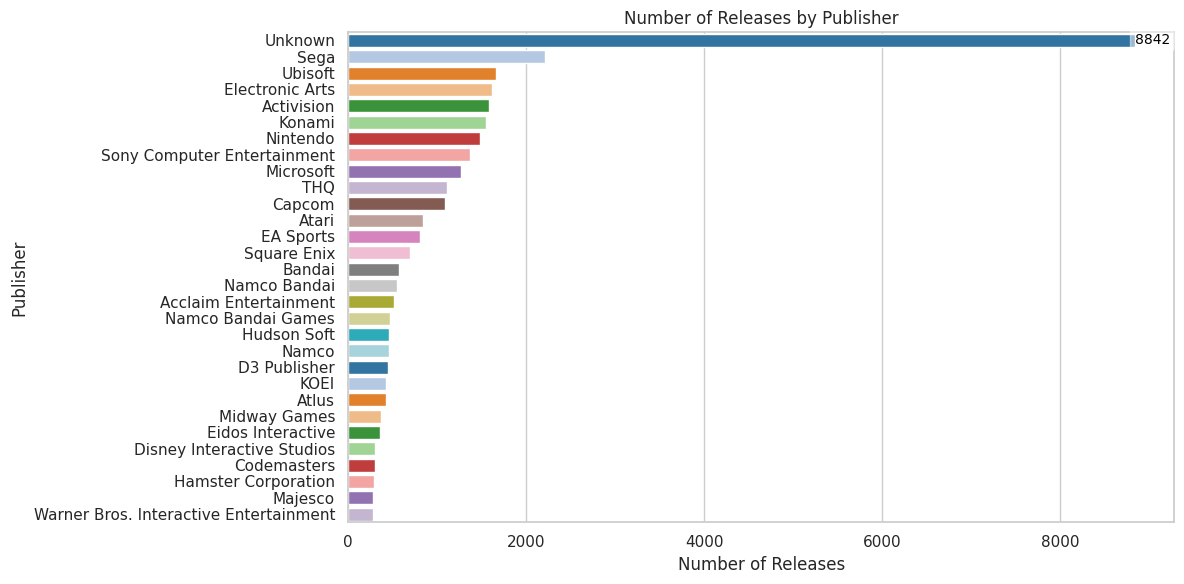

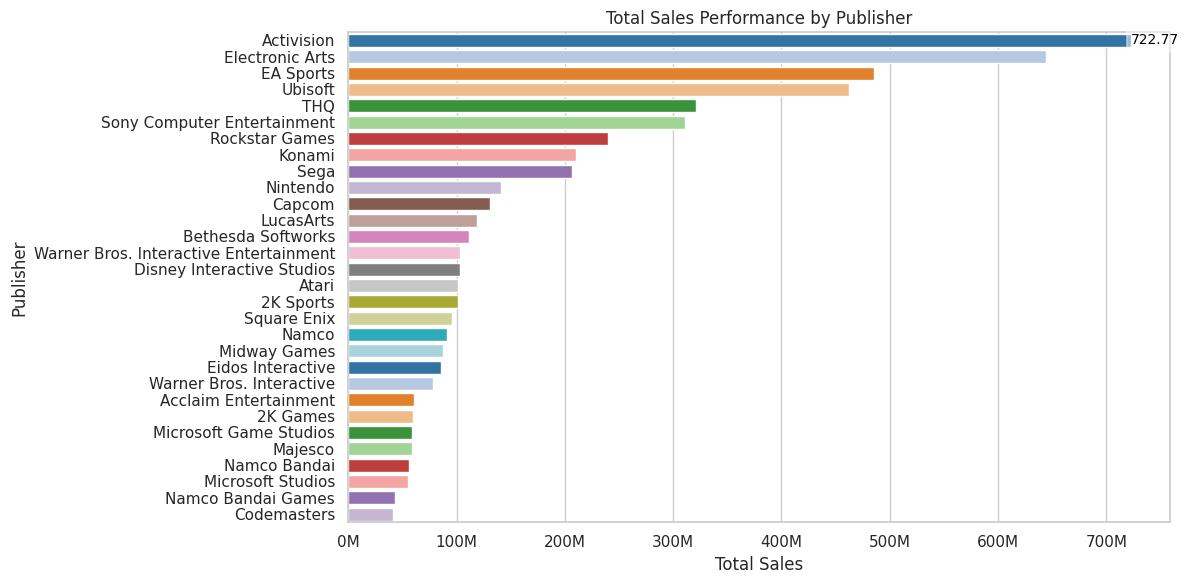

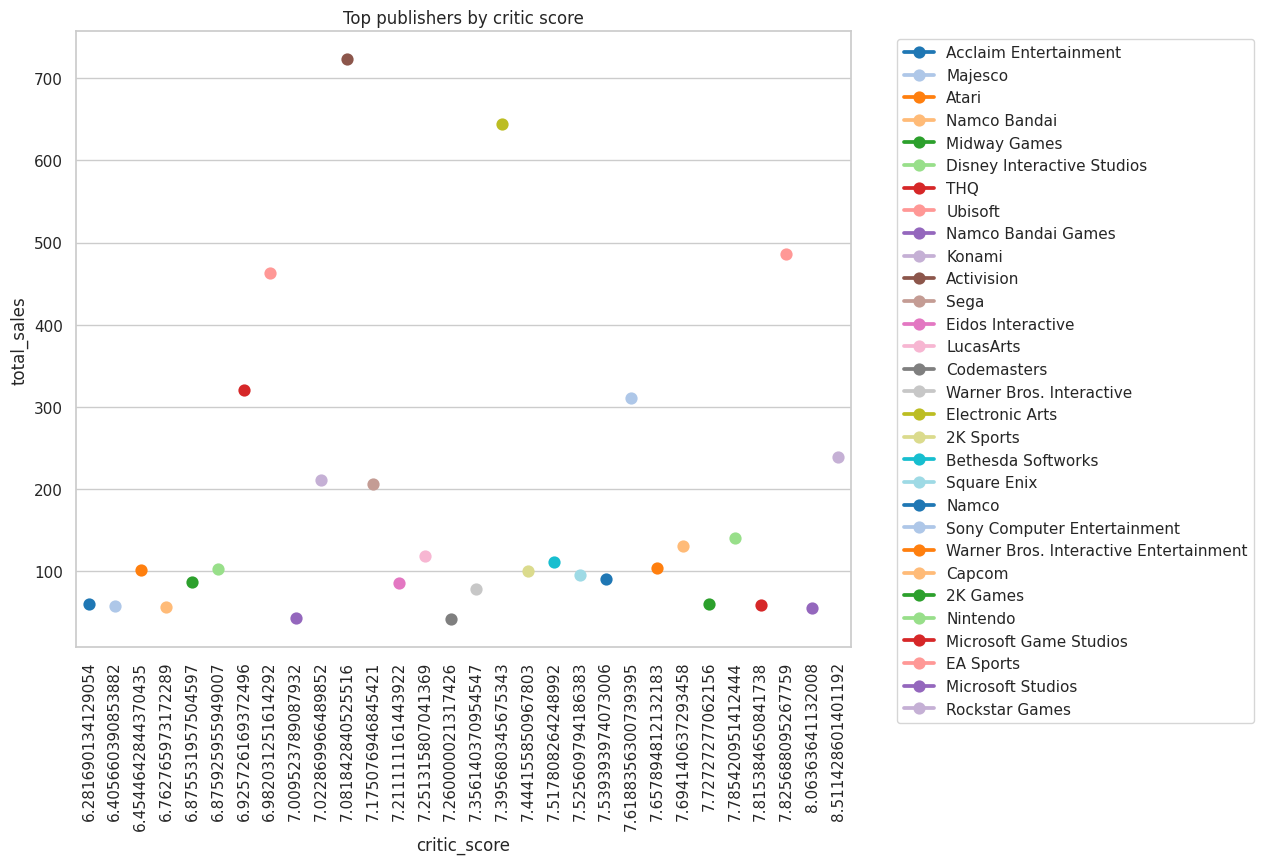

DataFrame[publisher: string, total_sales: double, title: bigint, critic_score: double]

In [12]:
publisher.get_top_sales_performance_by_publisher(df)